In [1]:
#neural network classification with pytorch
import torch
from torch import nn

In [2]:
#making some data
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#crate ccircles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
X.shape

(1000, 2)

In [5]:
print(f"firt 5 samples of x:\n{X[:5]}")

firt 5 samples of x:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [6]:
print(f"First 5 ssamples of y:\n{y[:5]}")

First 5 ssamples of y:
[1 1 1 1 0]


In [7]:
#therefore  2 features of x for 1 feature of y #binary classification
#make dataframe o fcirlce data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "y":y})

In [8]:
circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


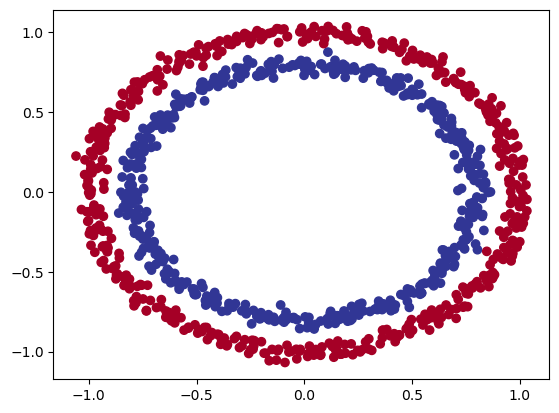

In [9]:
import matplotlib.pyplot as plt 
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
            )

In [10]:
#we are predicting which cirlce the point is gonna be in!
#dta we're working with is ofren reered to a s a toy dataset a data set that is small enought oexploremtn 
#but still sizablesnough to experiment with 

In [11]:
#check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
X_sample = X[0]
y_sample = y[0]

print(f"values for one sample of X: {X_sample} and the same y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

values for one sample of X: [0.75424625 0.23148074] and the same y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [13]:
X.dtype

dtype('float64')

In [14]:
type(X)

numpy.ndarray

In [15]:
#getting data into tensor adn creating train and test sploits
import torch
X = torch.from_numpy(X).type(torch.float32)
# y = torch.FloatTensor(y) #even this works
y=torch.from_numpy(y).type(torch.float32)


In [16]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [17]:
#split data into traiing nd test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% of data willl be 20test 
                                                    random_state=42)

In [18]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [19]:
#build a model to classify our blue and red dots
#steps
#setup device agnostic code
#constuct a model subclasing nn.module
#define loss and optimzer
#building a trainand testloop

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [21]:
X_train.shape

torch.Size([800, 2])

In [22]:
#model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer_1 = nn.Linear(in_features=2, #input layer
                                        out_features=4)
        self.linear_layer_2 = nn.Linear(in_features=4,  #upsacles to 4 faetures
                                        out_features=1) #out puts single feature ie same shape as y
        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(2,5),
        #     nn.Linear(5,1)
        # )
        
    def forward(self, x:torch.Tensor)-> torch.Tensor:
        return self.linear_layer_2(self.linear_layer_1(x)) #x->layer1->layer2->output
        # return two_linear_layers(x)

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (linear_layer_1): Linear(in_features=2, out_features=4, bias=True)
  (linear_layer_2): Linear(in_features=4, out_features=1, bias=True)
)

In [23]:
device

'cuda'

In [24]:
next(model_0.parameters()).device


device(type='cuda', index=0)

In [25]:
#lets replicate the mode  above using nn.Seqential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)


In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2902,  0.2753],
                      [-0.0616,  0.1152],
                      [ 0.4498,  0.6750],
                      [-0.5904, -0.1911],
                      [ 0.4975,  0.5896]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3196, -0.0204,  0.2598, -0.1567, -0.1691], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1915,  0.0415, -0.4055,  0.2222, -0.4272]], device='cuda:0')),
             ('1.bias', tensor([-0.0803], device='cuda:0'))])

In [27]:
 #make untrained preds
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f" Length of preds: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f" Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
    print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
    print(f"\nFirst 10 label:\n{y_test[:10]}")

 Length of preds: 200, Shape: torch.Size([200, 1])
 Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-1.],
        [ 0.],
        [-1.],
        [ 0.],
        [-0.],
        [-1.],
        [-1.],
        [ 0.],
        [-1.]], device='cuda:0')

First 10 label:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [28]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [29]:
#loss_fn = nn.BSEloss() #requires inputs to have gone thorught the sigmoid activation function priot to BCEloss
loss_fn  = nn.BCEWithLogitsLoss() #it has the sigmoid actiavation fucntion built in with BCELoss
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [30]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2902,  0.2753],
                      [-0.0616,  0.1152],
                      [ 0.4498,  0.6750],
                      [-0.5904, -0.1911],
                      [ 0.4975,  0.5896]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3196, -0.0204,  0.2598, -0.1567, -0.1691], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1915,  0.0415, -0.4055,  0.2222, -0.4272]], device='cuda:0')),
             ('1.bias', tensor([-0.0803], device='cuda:0'))])

In [31]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [32]:
#training our model
#building a training loop , steps:
#epoc int he range
#forward prop
#calc loss
#optim zero grad
#loss backward
#optimzer step
#building a test


Going from raw logits -> prediciton probabilities -> prediction labels
our model outs are going to e raw **logits**

we can covet these legits into prediction proabbiles by passing them to some kind of acitavtion function 

eg. sigmoid for binary class ficiat
soft max for multiclass classification 

In [33]:
#view the first 5 outputs of the forward pass on the ets data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.4533],
        [-0.8089],
        [ 0.3161],
        [-0.6706],
        [ 0.0575]], device='cuda:0')

these are called logits, they are the raw outputs of our model i=without being passed into any activation funciton 

In [34]:
#use the sigmoid activaiton functio on our model logits to turn them into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3886],
        [0.3081],
        [0.5784],
        [0.3384],
        [0.5144]], device='cuda:0')

In [35]:
#find the predicted labels from the predicted probabilities
y_preds = torch.round(y_pred_probs)

#in full logits-> pred probs->  pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#get rid of the etra fdimnesoin
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [37]:
#TRAINING
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100
epoch_count = []
test_loss_values = []
train_loss_values = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
    model_0.train()
    #1. forward pass

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turns lgits into pred prob into pred labels!

    #calc the acc
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) #if we used BSELoss

    loss = loss_fn(y_logits, y_train) #BCEwithlgits loss expects logits as nput 
    acc = accuracy_fn(y_true=y_train, y_pred = y_pred)

    #optimzer zro grad
    optimizer.zero_grad() #sets opotim to zeor

    #loss backawrd
    loss.backward() #propogates backward

    #optimzer step
    optimizer.step() #update the paras to reduce the gradients
    #TETING

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #calc thetest loss
        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_fn(y_true = y_test,
                               y_pred=test_pred)
    #print whats happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        test_loss_values.append(test_loss)
        train_loss_values.append(loss)
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc:{acc} | Test loss: {test_loss:.5f} | Test acc: {test_acc}")


Epoch: 0 | Train Loss: 0.73205 | Train Acc:47.875 | Test loss: 0.71344 | Test acc: 53.0
Epoch: 10 | Train Loss: 0.71872 | Train Acc:47.625 | Test loss: 0.70284 | Test acc: 53.0
Epoch: 20 | Train Loss: 0.71087 | Train Acc:48.25 | Test loss: 0.69723 | Test acc: 54.0
Epoch: 30 | Train Loss: 0.70590 | Train Acc:48.25 | Test loss: 0.69412 | Test acc: 54.0
Epoch: 40 | Train Loss: 0.70257 | Train Acc:48.5 | Test loss: 0.69238 | Test acc: 55.00000000000001
Epoch: 50 | Train Loss: 0.70024 | Train Acc:48.375 | Test loss: 0.69141 | Test acc: 54.50000000000001
Epoch: 60 | Train Loss: 0.69857 | Train Acc:48.375 | Test loss: 0.69090 | Test acc: 54.0
Epoch: 70 | Train Loss: 0.69734 | Train Acc:48.625 | Test loss: 0.69068 | Test acc: 54.0
Epoch: 80 | Train Loss: 0.69641 | Train Acc:48.875 | Test loss: 0.69064 | Test acc: 54.0
Epoch: 90 | Train Loss: 0.69571 | Train Acc:48.75 | Test loss: 0.69072 | Test acc: 54.50000000000001


In [38]:
# make preds and evaluate the model and wh y its not working
#looks like its not learning anything and just guessing 
#so make them visual to inspect it visualize visualize visualuze
#to do so we're going to import a funciton called plot_decision_boundary

In [39]:
import requests
from pathlib import Path

#download helperfunction from learnpytorch repo 
if Path("helper_functions.py").is_file():
    print("Helper function already exists. skipping download..")
else:
    print("Downloadign helper_function.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

Helper function already exists. skipping download..


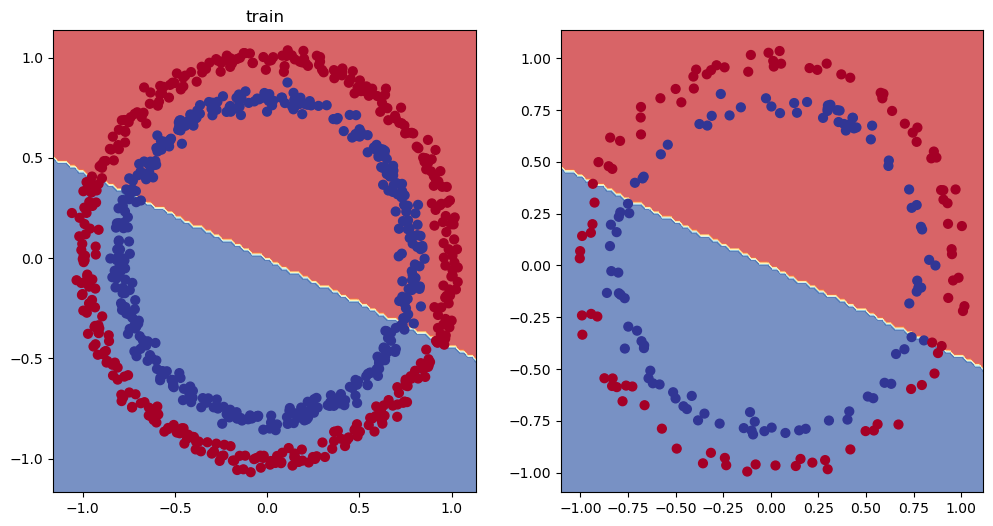

In [40]:
#plot decision oundy of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_0, X_test, y_test)

In [41]:
#THE REASON THE MODEL IS PREDICTING THE STRAIGHT LINE IS BECAUSE OUR LAYERS ARE LINEAR!


wWays to improce the model (in general)

* adding more layers
* add more hidden units/ nodes/ neurons
* fit for longer (lnger epochs)
* changing hte activation function 
* change the optimzer fn
* change the laernign rate
* change the loss function 


these options are all from  models perpective because they dealld irectly with the model they are refered to as **hyPER PARAMETERS**
rather than the data.
u can improve the model through the data perspective  AS WELL!

In [42]:
#for testing purposes right noww the only changs we are gonna mke is 

#trying to add more hidden layers
# incrsae the nuo of hidden units/neurons, incrase hte number of epochs
#incrase th epochs



BUT IF WE DO ALL 3 at the same time we ouldnt know which one offered the improvement

therefore we wannad o experimetn tracking and chagne hyperparas 1 at a time 

In [43]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features= 10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # z = self.layer_1(x) #z is for logits
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z

        return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operation leverages speedups possible

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
model_1.state_dict()
next(model_1.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188],
        [ 0.6146,  0.1323],
        [ 0.5224,  0.0958],
        [ 0.3410, -0.0998],
        [ 0.5451,  0.1045],
        [-0.3301,  0.1802]], device='cuda:0', requires_grad=True)

In [45]:
#create a loss fn
loss = nn.BCEWithLogitsLoss()
#create an optimzer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [46]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

#put data on target device
X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    #training
    model_1.train()
    #forwawrd pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #logits -> pred prob-> pred labels

    #calc the acc and loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    #optimzer zer  graod
    optimizer.zero_grad()

    #los sbackwrad
    loss.backward()

    #optimzer step
    optimizer.step()

    # testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #clac the loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred= test_pred)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Train Acc:{acc} | Test loss: {test_loss:.5f} | Test acc: {test_acc}")

Epoch: 0 | Train Loss: 0.69396 | Train Acc:50.875 | Test loss: 0.69261 | Test acc: 51.0


Epoch: 100 | Train Loss: 0.69305 | Train Acc:50.375 | Test loss: 0.69379 | Test acc: 48.0
Epoch: 200 | Train Loss: 0.69299 | Train Acc:51.125 | Test loss: 0.69437 | Test acc: 46.0
Epoch: 300 | Train Loss: 0.69298 | Train Acc:51.625 | Test loss: 0.69458 | Test acc: 45.0
Epoch: 400 | Train Loss: 0.69298 | Train Acc:51.125 | Test loss: 0.69465 | Test acc: 46.0
Epoch: 500 | Train Loss: 0.69298 | Train Acc:51.0 | Test loss: 0.69467 | Test acc: 46.0
Epoch: 600 | Train Loss: 0.69298 | Train Acc:51.0 | Test loss: 0.69468 | Test acc: 46.0
Epoch: 700 | Train Loss: 0.69298 | Train Acc:51.0 | Test loss: 0.69468 | Test acc: 46.0
Epoch: 800 | Train Loss: 0.69298 | Train Acc:51.0 | Test loss: 0.69468 | Test acc: 46.0
Epoch: 900 | Train Loss: 0.69298 | Train Acc:51.0 | Test loss: 0.69468 | Test acc: 46.0


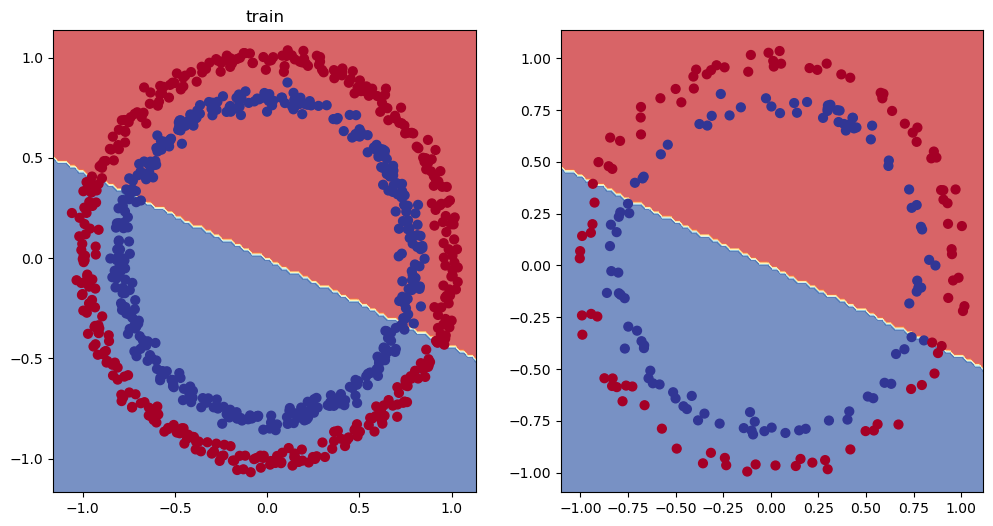

In [47]:
#plot decision oundy of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plot_decision_boundary(model_0, X_test, y_test)

# therefore it wasnt any better....

# is our data non linear...
# is it not compatible for our linear layers...

#preparing to see if our modelcan fit a straight line 
 one way to trouble shoto a larger prolem is to test out a smaller problem 

In [48]:
weight = 0.7
bias = 0.3
start =0 
end =1 
step = 0.01
X_regression = torch.arange(start,end ,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [49]:
#create train and tes splot
from sklearn.model_selection import train_test_split
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression,
                                                                                                y_regression,
                                                                                                test_size=0.2,
                                                                                                random_state=42)
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

In [50]:
import requests
from pathlib import Path

#download helperfunction from learnpytorch repo 
if Path("helper_functions.py").is_file():
    print("Helper function already exists. skipping download..")
else:
    print("Downloadign helper_function.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

Helper function already exists. skipping download..


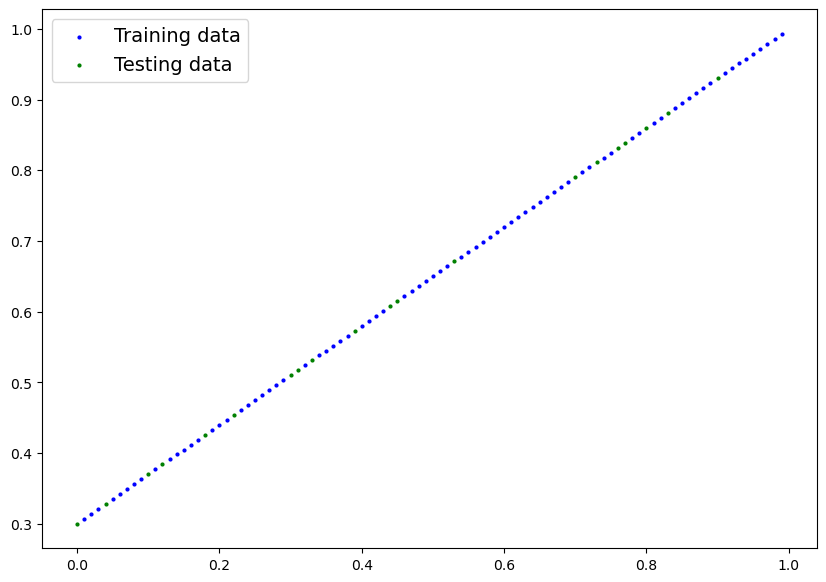

In [51]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [52]:
#adjust mdoel1 to fit  astaright line 
#same arch itructe as model1 (but using nn.sequential)

model_2 = nn.Sequential(
    nn.Linear(1,10),
    nn.Linear(10,10),
    nn.Linear(10,1)
).to(device)

In [57]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [58]:
#train th emode
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#training th emodel

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    if epoch % 100 == 0:
        print(f"epoch: {epoch} | train_loss = {loss:.5f} | test_loss: {test_loss:.5f}")


epoch: 0 | train_loss = 0.07215 | test_loss: 0.05650
epoch: 100 | train_loss = 0.00259 | test_loss: 0.00622
epoch: 200 | train_loss = 0.00133 | test_loss: 0.00749
epoch: 300 | train_loss = 0.00123 | test_loss: 0.00747
epoch: 400 | train_loss = 0.00095 | test_loss: 0.00792
epoch: 500 | train_loss = 0.00158 | test_loss: 0.00709
epoch: 600 | train_loss = 0.00134 | test_loss: 0.00743
epoch: 700 | train_loss = 0.00089 | test_loss: 0.00751
epoch: 800 | train_loss = 0.00109 | test_loss: 0.00737
epoch: 900 | train_loss = 0.00102 | test_loss: 0.00747


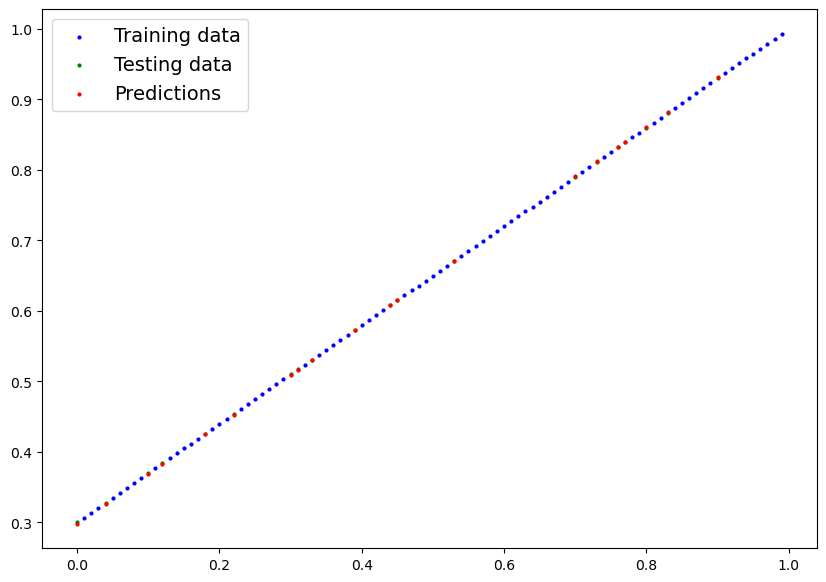

In [61]:
#turn on eval mode 

model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

plot_predictions(X_train_regression.cpu(), y_train_regression.cpu(), X_test_regression.cpu(), y_test_regression.cpu(),
                 predictions=y_preds.cpu())